In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, impute, cluster
from nilearn import masking, plotting

import sys
sys.path.insert(1, "../")
import mvcomp


In [2]:
cc_mask = "../../data/CC_11_mask.nii.gz"
cc_t2 = "../../data/CC_T2_warped_mean_1001subjects.nii.gz"

# Import and Cluster D2 map

In [3]:
d2 = np.load("../../data/d2_cc_1001_0p99.npy")
d2.shape

(2854, 1001)

In [37]:
imp = impute.SimpleImputer(strategy='mean')
pwr = preprocessing.PowerTransformer(standardize=False)
kmeans = cluster.KMeans(n_clusters=9)

In [38]:
d2_imp = imp.fit_transform(d2)
d2_pwr = pwr.fit_transform(d2_st)
d2_kmeans = kmeans.fit_predict(d2_pwr)

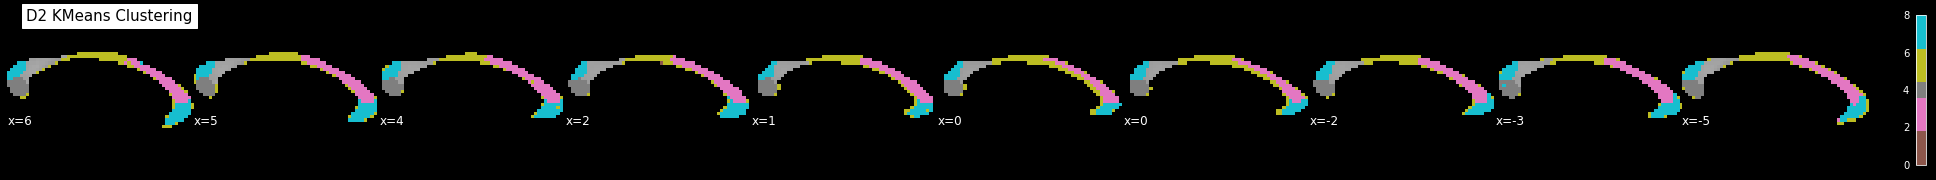

In [39]:
plotting.plot_stat_map(masking.unmask(d2_kmeans, cc_mask),bg_img=cc_t2, title="D2 KMeans Clustering",
                       cmap="tab10", display_mode="x", cut_coords=10)

# Import and cluster the features

In [9]:
all_feats = pd.read_pickle("../../data/allfeats.pkl")

In [23]:
all_feats.keys() # all feats has the features 
all_feats["AD"][XXXXX].shape # Of all participants

(2854,)

In [32]:
labels_of_features = {}
for feature in all_feats.keys():
    print(feature, end=" ")
    km, feat_km= None, None
    km = cluster.KMeans(n_clusters=9)
    corpus_feat = pd.DataFrame(all_feats[feature]).values
    pwr = preprocessing.PowerTransformer(standardize=False).fit_transform(corpus_feat)
    feat_km = km.fit(pwr)
    labels_of_features[feature] = feat_km.labels_

AD 

/home/remoteuser/alazak/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


FA 

/home/remoteuser/alazak/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


FODvol0Scaled MD 

/home/remoteuser/alazak/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


NODDI_OD NODDI_icvf 

/home/remoteuser/alazak/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


RD 

/home/remoteuser/alazak/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


T1_divided_byT2 

/opt/quarantine/anaconda3/2020.11/install/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/quarantine/anaconda3/2020.11/install/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


meanFC_weighted_byFD sumFDC 

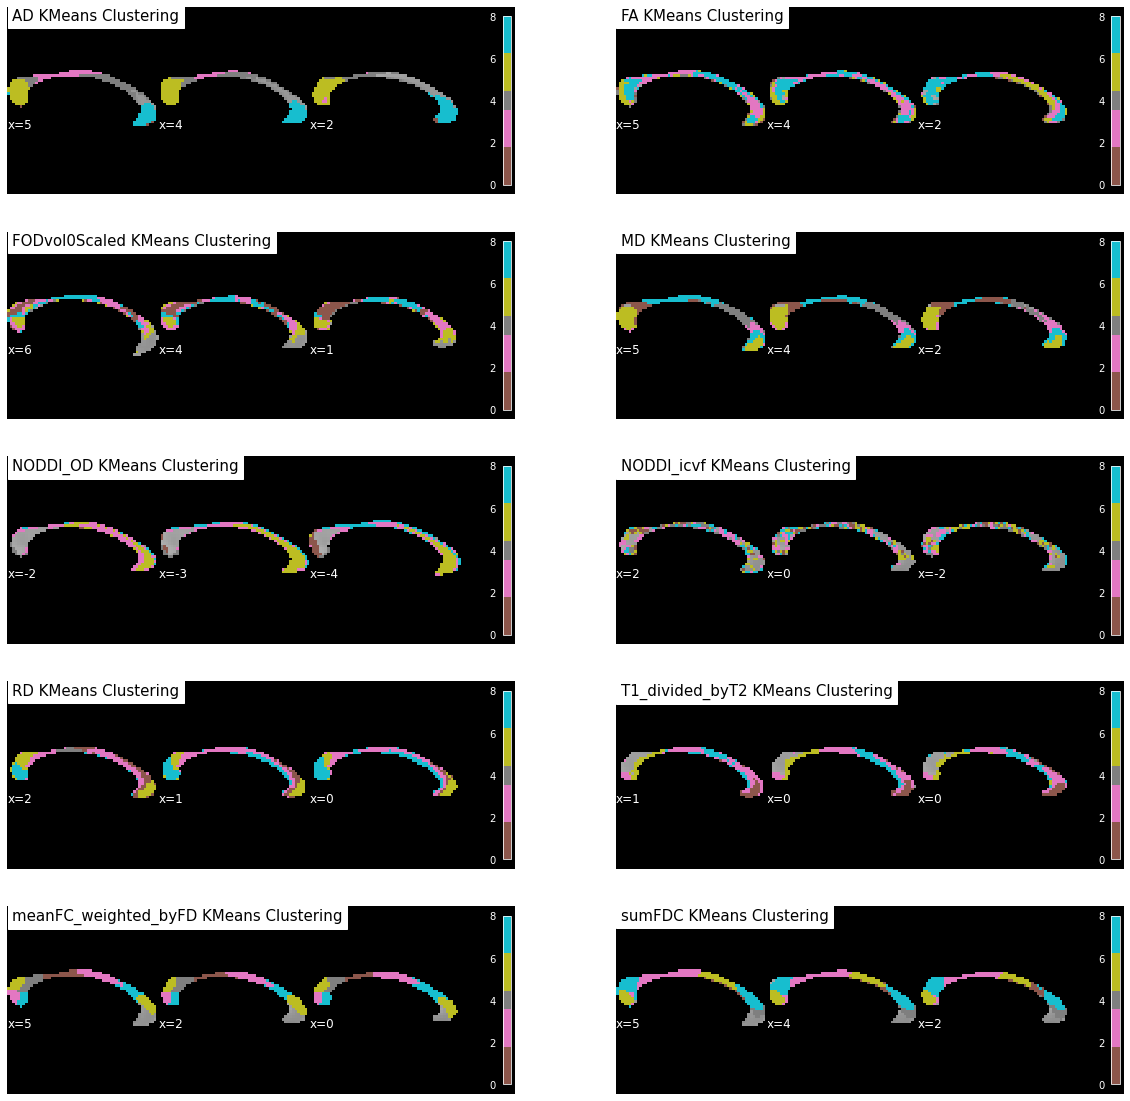

In [33]:
fig,axes = plt.subplots(5,2,figsize=(20,20))

for _,_featkey in zip(axes.ravel(),labels_of_features.keys()):
    
    ecuplot = plotting.plot_stat_map(masking.unmask(labels_of_features[_featkey],cc_mask), bg_img=cc_t2,
                               cmap="tab10", display_mode="x", cut_coords=3, title=f"{_featkey} KMeans Clustering",
                                   figure=fig,axes=_)
